In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

bai 1


In [ ]:
input = np.array([[1,6,11,16,21],
                 [2,7,12,17,22],
                 [3,8,13,18,23],
                 [4,9,14,19,24],
                 [5,10,15,20,25]])


kernel = np.array([[0.1111,0.1111,0.1111],
                   [0.1111,0.1111,0.1111],
                   [0.1111,0.1111,0.1111]])
print(input)

[[ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]
 [ 5 10 15 20 25]]


In [ ]:
b = np.pad(input,1,mode='constant')
print(b)

[[ 0  0  0  0  0  0  0]
 [ 0  1  6 11 16 21  0]
 [ 0  2  7 12 17 22  0]
 [ 0  3  8 13 18 23  0]
 [ 0  4  9 14 19 24  0]
 [ 0  5 10 15 20 25  0]
 [ 0  0  0  0  0  0  0]]


In [ ]:
matrix = np.zeros((5,5))

def valueConvolution(b,kernel,i,j):
  place_data = b[i:i+3,j:j+3]
  multi = place_data * kernel
  sum_multi = np.sum(multi)
  return sum_multi


for i in range(5):
  for j in range(5):
    matrix[i][j]=  valueConvolution(b,kernel,i,j)
print(matrix)

[[ 1.  6. 11. 16. 21.]
 [ 2.  7. 12. 17. 22.]
 [ 3.  8. 13. 18. 23.]
 [ 4.  9. 14. 19. 24.]
 [ 5. 10. 15. 20. 25.]]


bai 2


In [ ]:
img = np.asarray([[20,20,20,10,10,10,10,10,10],
                [20,20,20,20,20,20,20,20,10],
                [20,20,20,10,10,10,10,20,10],
                [20,20,10,10,10,10,10,20,10],
                [20,10,10,10,10,10,10,20,10],
                [10,10,10,10,20,10,10,20,10],
                [10,10,10,10,10,10,10,10,10],
                [20,10,20,20,10,10,10,20,20],
                [20,10,10,20,10,10,20,10,20]],dtype=np.float32)

kernel = np.array([[-1,-1,0],
                   [-1,0,1],
                   [0,1,1]],dtype=np.float32)

In [ ]:
a = np.pad(img,1,mode='constant')
print(a)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20 20 20 10 10 10 10 10 10  0]
 [ 0 20 20 20 20 20 20 20 20 10  0]
 [ 0 20 20 20 10 10 10 10 20 10  0]
 [ 0 20 20 10 10 10 10 10 20 10  0]
 [ 0 20 10 10 10 10 10 10 20 10  0]
 [ 0 10 10 10 10 20 10 10 20 10  0]
 [ 0 10 10 10 10 10 10 10 10 10  0]
 [ 0 20 10 20 20 10 10 10 20 20  0]
 [ 0 20 10 10 20 10 10 20 10 20  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
matrix = np.zeros((9,9))

def valueConvolution(b,kernel,i,j):
  place_data = b[i:i+3,j:j+3]
  multi = place_data * kernel
  sum_multi = np.sum(multi)
  return sum_multi

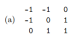

In [ ]:
kernel_180 = kernel[:,::-1]

In [ ]:
greyScale = cv.filter2D(img,-1,kernel,borderType=cv.BORDER_CONSTANT)
print(greyScale)

[[ 60.  40.  30.  30.  40.  40.  40.  30.   0.]
 [ 40.   0. -10. -10.   0.   0.  10.   0. -30.]
 [ 40. -10. -30. -30. -20. -20.   0. -10. -40.]
 [ 30. -30. -30. -10.   0.   0.  20.   0. -40.]
 [ 10. -30. -10.  10.  10.   0.  20.   0. -40.]
 [ 10. -10.   0.  10.   0. -10.  10. -10. -40.]
 [ 30.  10.  20.  10. -10. -10.  10.  10. -20.]
 [ 30.   0.  20.   0. -10.  10.  20.  20. -20.]
 [-10. -40. -20. -40. -40. -10. -20. -30. -50.]]


In [ ]:
for i in range(9):
  for j in range(9):
    matrix[i][j]=  valueConvolution(a,kernel,i,j)
print(matrix)

[[ 60.  40.  30.  30.  40.  40.  40.  30.   0.]
 [ 40.   0. -10. -10.   0.   0.  10.   0. -30.]
 [ 40. -10. -30. -30. -20. -20.   0. -10. -40.]
 [ 30. -30. -30. -10.   0.   0.  20.   0. -40.]
 [ 10. -30. -10.  10.  10.   0.  20.   0. -40.]
 [ 10. -10.   0.  10.   0. -10.  10. -10. -40.]
 [ 30.  10.  20.  10. -10. -10.  10.  10. -20.]
 [ 30.   0.  20.   0. -10.  10.  20.  20. -20.]
 [-10. -40. -20. -40. -40. -10. -20. -30. -50.]]


In [ ]:
for i in range(9):
  for j in range(9):
    matrix[i][j]=  valueConvolution(a,kernel_180,i,j)
print(matrix)

[[  0.  40.  50.  50.  40.  40.  40.  40.  40.]
 [-40.   0.  10.  10.   0.   0.   0.  20.  40.]
 [-40.   0.   0. -10. -20. -20. -30.   0.  40.]
 [-40.   0.   0.   0.   0.   0. -20.   0.  40.]
 [-40.   0.   0.   0.  10.  10. -20.   0.  40.]
 [-30.   0.   0. -10.   0.  10. -20. -10.  30.]
 [-10.  10.  10.  10.   0.   0. -10.   0.  40.]
 [-10.  10. -10.  20.  20.   0.   0.   0.  40.]
 [-40. -20. -50. -30. -10. -30. -30. -40. -10.]]


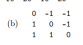

In [ ]:
kernel_b = np.array([[0,-1,-1],
                     [1,0,-1],
                     [1,1,0]])

In [ ]:
kernel_b_180 = kernel_b[:,::-1]

In [ ]:
for i in range(9):
  for j in range(9):
    matrix[i][j]=  valueConvolution(a,kernel_b,i,j)
print(matrix)

[[  0.  40.  50.  50.  40.  40.  40.  40.  40.]
 [-40.   0.  10.  10.   0.   0.   0.  20.  40.]
 [-40.   0.   0. -10. -20. -20. -30.   0.  40.]
 [-40.   0.   0.   0.   0.   0. -20.   0.  40.]
 [-40.   0.   0.   0.  10.  10. -20.   0.  40.]
 [-30.   0.   0. -10.   0.  10. -20. -10.  30.]
 [-10.  10.  10.  10.   0.   0. -10.   0.  40.]
 [-10.  10. -10.  20.  20.   0.   0.   0.  40.]
 [-40. -20. -50. -30. -10. -30. -30. -40. -10.]]


In [ ]:
for i in range(9):
  for j in range(9):
    matrix[i][j]=  valueConvolution(a,kernel_b_180,i,j)
print(matrix)

[[ 60.  40.  30.  30.  40.  40.  40.  30.   0.]
 [ 40.   0. -10. -10.   0.   0.  10.   0. -30.]
 [ 40. -10. -30. -30. -20. -20.   0. -10. -40.]
 [ 30. -30. -30. -10.   0.   0.  20.   0. -40.]
 [ 10. -30. -10.  10.  10.   0.  20.   0. -40.]
 [ 10. -10.   0.  10.   0. -10.  10. -10. -40.]
 [ 30.  10.  20.  10. -10. -10.  10.  10. -20.]
 [ 30.   0.  20.   0. -10.  10.  20.  20. -20.]
 [-10. -40. -20. -40. -40. -10. -20. -30. -50.]]


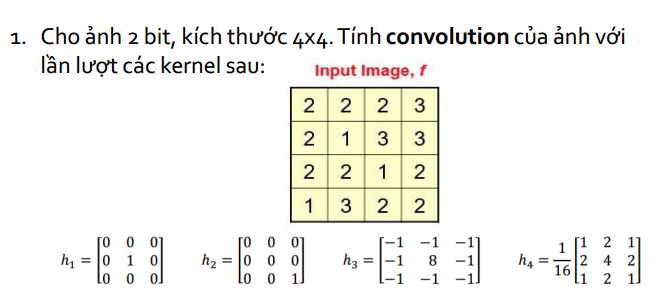

In [ ]:
#ex

img_2bit = np.array([[2,2,2,3],
                     [2,1,3,3],
                     [2,2,1,2],
                     [1,3,2,2]])

kernel  = np.array([[0,0,0],
                    [0,1,0],
                    [0,0,0]])

kernel_2  = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,1]])

kernel_h3  = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])
img_pad  = np.pad(img_2bit,1,mode='constant')
print(img_pad)

[[0 0 0 0 0 0]
 [0 2 2 2 3 0]
 [0 2 1 3 3 0]
 [0 2 2 1 2 0]
 [0 1 3 2 2 0]
 [0 0 0 0 0 0]]


In [ ]:
for i in range(4):
  for j in range(4):
    matrix[i][j]=  valueConvolution(img_pad,kernel,i,j)
print(matrix)

[[  5.   4.   7.   1.  40.]
 [  3.   0.   1.  -6.   0.]
 [  4.   1.   0.  -5. -20.]
 [  1.  -3.  -4.  -5.   0.]
 [ 10. -30. -10.  10.  10.]]


In [ ]:
for i in range(4):
  for j in range(4):
    matrix[i][j]=  valueConvolution(img_pad,kernel_2,i,j)
print(matrix)

[[  1.   3.   3.   0.  40.]
 [  2.   1.   2.   0.   0.]
 [  3.   2.   2.   0. -20.]
 [  0.   0.   0.   0.   0.]
 [ 10. -30. -10.  10.  10.]]


In [ ]:
for i in range(4):
  for j in range(4):
    matrix[i][j]=  valueConvolution(img_pad,kernel_h3,i,j)
print(matrix)

[[ 11.   6.   4.  16.  40.]
 [  7.  -8.   8.  13.   0.]
 [  7.   1. -10.   5. -20.]
 [  1.  16.   6.  11.   0.]
 [ 10. -30. -10.  10.  10.]]


In [ ]:
kernel_h4 = 1/16 * np.array([[1,2,1],
                          [2,4,2],
                          [1,2,1]])

In [ ]:
for i in range(4):
  for j in range(4):
    matrix[i][j]=  valueConvolution(img_pad,kernel_h4,i,j)
print(matrix)

[[  1.0625   1.4375   1.75     1.5625  40.    ]
 [  1.375    1.8125   2.1875   1.9375   0.    ]
 [  1.375    1.875    1.9375   1.5625 -20.    ]
 [  1.       1.5625   1.5      1.0625   0.    ]
 [ 10.     -30.     -10.      10.      10.    ]]


In [ ]:
img = cv.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/ngua.jpg')

img_array = np.array([[3,7,6,2,0],
                      [2,4,6,1,1],
                      [4,7,2,5,4],
                      [3,0,6,2,1],
                      [5,7,5,1,2]])

kernel = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])


In [ ]:
img_array_pad = np.pad(img_array,1,mode='constant')
print(img_array_pad)

[[0 0 0 0 0 0 0]
 [0 3 7 6 2 0 0]
 [0 2 4 6 1 1 0]
 [0 4 7 2 5 4 0]
 [0 3 0 6 2 1 0]
 [0 5 7 5 1 2 0]
 [0 0 0 0 0 0 0]]


In [ ]:
matrix = np.zeros((5,5))

def valueConvolution(b,kernel,i,j):
  place_data = b[i:i+3,j:j+3]
  multi = place_data * kernel
  sum_multi = np.sum(multi)
  return sum_multi


for i in range(5):
  for j in range(5):
    matrix[i][j]=  valueConvolution(img_array_pad,kernel,i,j)
print(matrix)

[[  8.  16.  17.   9.   3.]
 [  2.  -3.  -5.   6.  11.]
 [ -2.  -7.  -3.   2.   1.]
 [  2.   4.   2.  -7.  -8.]
 [ -6.  -9. -14. -11.  -4.]]


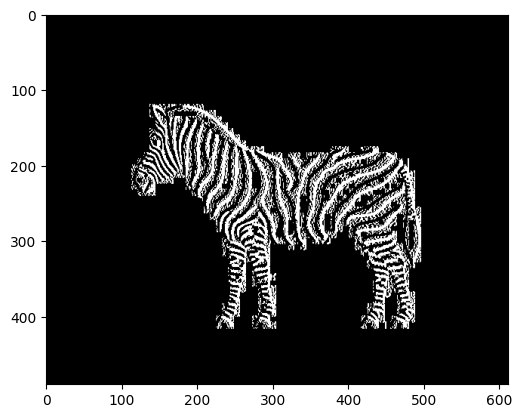

In [ ]:
img_cv = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
plt.imshow(img_cv)
plt.show()